# Exercise: Learning Rate

Unit 5 - exercise 14 - Build model, adjust learning rate, see change in training

What we’re trying to teach:

- Learning rate
- See change in training speed
- Put learning rate too high
- Put it too low
- Tune it just right


## Preparing data
In this unit we are using fictional investment banking dataset, that correlates the amount of money accrued according to the age of accounts.



In [24]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import PolynomialLinearRegression as plr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments_extended.csv', index_col=False, sep=",",header=0)

# Check what's in the dataset
print(dataset.head())
print(dataset.info())



  Account ID  Account Age  Total Accrued
0         2A           22           4638
1         3A           46          34734
2         4A           14           1379
3         5A           29           9521
4         6A           35          13374
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Account ID     21600 non-null  object
 1   Account Age    21600 non-null  int64 
 2   Total Accrued  21600 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 506.4+ KB
None


## Hyperparameters

........
### Learning Rate
The value that determines the "step size" taken in each iteration when minimizing the cost function (we will take a deeper look at this in the next Unit).





In the following exercises we will use a custom implementation of Polynomial Linear Regression that let's us set the hyperparameters. We will then compare the results to the previous model and see if **tuning** hyperparams can improve performance.

TIME IT

In [25]:
# Train model with a very high Learning Rate
X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

# Initialize and train model
# setting values for learning rate and number of iterations
custom_model_0 = plr.PolynomialLinearRegression()
t0 = time.perf_counter()
weights_0, J_history_0 = custom_model_0.fit(X, y, learning_rate=0.715, num_iters=500)
t1 = time.perf_counter()

# Generate predictions based on original dataset
y_hat = custom_model_0.predict(X)

rmse_0 = np.sqrt(mean_squared_error(y,y_hat))
r2_0 = r2_score(y,y_hat)
delta_0 = (t1 - t0) * 1000
print(f"RMSE metrics: {rmse_0}")
print(f"R2 metrics: {r2_0}")
print(f"Training Time: {delta_0} ms")



RMSE metrics: 7129.980456311834
R2 metrics: 0.6491028303672846
Training Time: 1200.269077991834 ms


In [26]:
# use a very low Learning Rate

custom_model_1 = plr.PolynomialLinearRegression()
t2 = time.perf_counter()
weights_1, J_history_1 = custom_model_1.fit(X, y, learning_rate=0.005, num_iters=500)
t3 = time.perf_counter()

# Generate predictions based on original dataset
y_hat_1 = custom_model_1.predict(X)

rmse_1 = np.sqrt(mean_squared_error(y,y_hat_1))
r2_1 = r2_score(y,y_hat_1)
delta_1 = (t3 - t2) * 1000
print(f"RMSE metrics: {rmse_1}")
print(f"R2 metrics: {r2_1}")
print(f"Training Time: {delta_1} ms")

RMSE metrics: 2452.5470190843785
R2 metrics: 0.9584818617449942
Training Time: 1171.0553559969412 ms


In [27]:
# Try an optimal Learning Rate

custom_model_2 = plr.PolynomialLinearRegression()
t4 = time.perf_counter()
weights_2, J_history_2 = custom_model_2.fit(X, y, learning_rate=0.01, num_iters=500)
t5 = time.perf_counter()

# Generate predictions based on original dataset
y_hat_2 = custom_model_2.predict(X)

rmse_2 = np.sqrt(mean_squared_error(y,y_hat_2))
r2_2 = r2_score(y,y_hat_2)
delta_2 = (t5 - t4) * 1000
print(f"RMSE metrics: {rmse_2}")
print(f"R2 metrics: {r2_2}")
print(f"Training Time: {delta_2} ms")

RMSE metrics: 1986.3881409768626
R2 metrics: 0.9727647470094922
Training Time: 1844.8210709902924 ms


Text(0, 0.5, 'Cost')

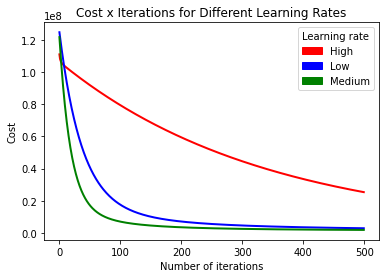

In [29]:
# Plot Cost X Number of Iterations for each LR
fig = plt.figure()
axes = fig.add_subplot()
axes.set_title('Cost x Iterations for Different Learning Rates')

l0 = plt.plot(np.arange(len(J_history_0)), J_history_0, lw=2, color="red")
l1 = plt.plot(np.arange(len(J_history_1)), J_history_1, lw=2, color="blue")
l2 = plt.plot(np.arange(len(J_history_2)), J_history_2, lw=2, color="green")
# Add legend
red_patch = mpatches.Patch(color="red", label="High")
blue_patch = mpatches.Patch(color="blue", label="Low")
green_patch = mpatches.Patch(color="green", label="Medium")

plt.legend(title = "Learning rate", handles=[red_patch, blue_patch, green_patch])
plt.xlabel("Number of iterations")
plt.ylabel("Cost")


Draw a conclusion



## Summary

In this exercise .....